In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
Load the dataset

In [10]:
df = pd.read_csv("C:\\Users\\USER-11\\Downloads\\archive\\customer_churn_data.csv")

In [ ]:
Display head

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes


In [ ]:
Display basic info

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [ ]:
Check for missing values

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
Churn Distribution (Pie Chart)

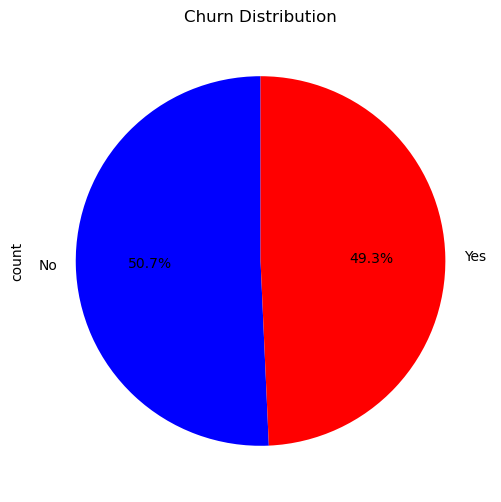

In [14]:
df['Churn'].value_counts()
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['blue','red'])
plt.title('Churn Distribution')
plt.savefig('churn_distribution.png')

In [ ]:
Churn by Contract Type

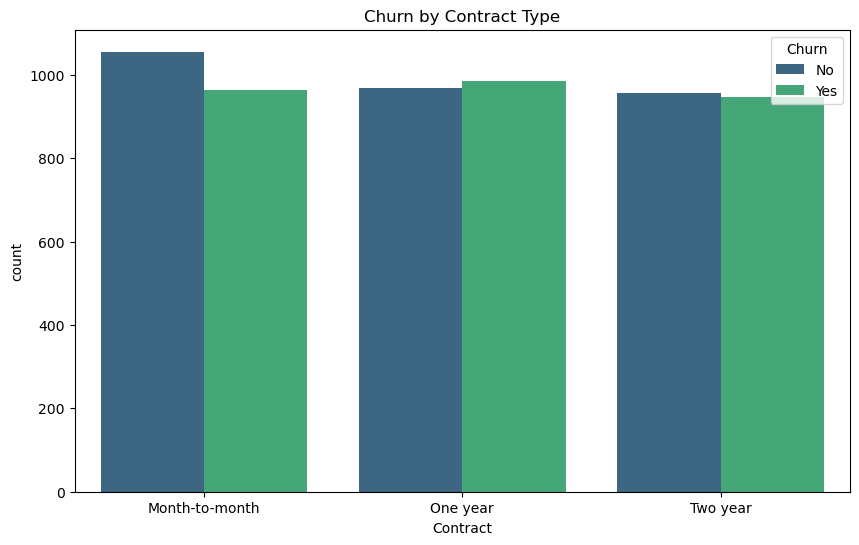

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn by Contract Type')
plt.savefig('churn_by_contract.png')

In [ ]:
During model development, I use scikit-learn components like SimpleImputer for handling missing values, StandardScaler for feature scaling, OneHotEncoder for categorical encoding, ColumnTransformer for applying transformations to different feature types, and Pipeline to streamline preprocessing and model training.

In [16]:
from sklearn .model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import OneHotEncoder,StandardScaler
from sklearn. impute import SimpleImputer
from sklearn.metrics import accuracy_score,r2_score

In [17]:
x = df.drop(['customerID','gender','Churn'],axis=1)
y = df['Churn']

In [18]:
numerical_cols = x.select_dtypes(include=['int64,float64']).columns.tolist()

In [19]:
categorical_cols = x.select_dtypes(include=['object']).columns.tolist()

In [20]:
numerical_transformer=Pipeline(steps=[
                              ('imputer',SimpleImputer(strategy='mean')),
                              ('scaler',StandardScaler())
])

In [21]:
categorical_transformer = Pipeline(steps=[
                                  ('imputer',SimpleImputer(strategy='most_frequent')),
                                  ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

In [22]:
preprocessor = ColumnTransformer(transformers=[
                               ('num',numerical_transformer,numerical_cols),
                               ('cat',categorical_transformer,categorical_cols)
])

In [23]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model =Pipeline(steps=[
                     ('pre',preprocessor),('reg',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [26]:
model.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  []),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('reg', RandomForestClassifier(random_state=42))])

In [27]:
predict = model.predict(X_test)


print(f'Accuracy:{accuracy_score(predict,y_test)*100:.4f}')

Accuracy:51.2755
